## Clasificación binaria

*  la ultima capa tendrá una beurobna de salida con activación sigmoid para convertir a 0 o 1
* La función de coste será binary Cross Entropy, ya que es diferenciable (se pùeden calcular derivadas sobre ella)

In [1]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


In [2]:
keras = tf.keras

In [3]:
data = load_breast_cancer()
X = data.data        # Matriz de características
y = data.target      # Vector de etiquetas (0 = maligno, 1 = benigno)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
# 0. random state
keras.backend.clear_session()
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# 1, Arquitectura red neuronal
model = keras.Sequential([
    #keras.layers.Input(shape=(X.shape[1])), # calcula el numero de columnas de X y lo añade, pero no es necesario, lo detecta auto maticamente
    keras.layers.Dense(256, activation='relu'), # una capa
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dense(32, activation='relu'), 
    keras.layers.Dense(16, activation='relu'), 

    keras.layers.Dense(1, activation='sigmoid'), # capa de salida para clasificacion binaria
    
])

# 2. Compilar el modelo:
model.compile(
    loss = keras.losses.BinaryCrossentropy(), # es la función más importante!el que vamos a optimizar
    optimizer = keras.optimizers.Adam(), # Adam es el mas sofisticado
    metrics = ['accuracy',
               keras.metrics.Precision(),
               keras.metrics.Recall(),
               keras.metrics.AUC()]
)

# 3. Fit model (entrenar el modelo)
# batch_size: por defecto es 32, indica cuántos ejemplos se utilizan en cada iteración del entrenamiento
model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=1, batch_size=32)



Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5601 - auc: 0.4480 - loss: 10.8671 - precision: 0.6152 - recall: 0.7930 - val_accuracy: 0.6923 - val_auc: 0.7409 - val_loss: 0.5784 - val_precision: 0.6744 - val_recall: 1.0000
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8270 - auc: 0.8423 - loss: 0.5115 - precision: 0.8069 - recall: 0.9571 - val_accuracy: 0.8791 - val_auc: 0.8613 - val_loss: 0.4541 - val_precision: 0.8615 - val_recall: 0.9655
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9184 - auc: 0.9522 - loss: 0.3913 - precision: 0.9065 - recall: 0.9711 - val_accuracy: 0.8901 - val_auc: 0.9331 - val_loss: 0.3996 - val_precision: 0.8871 - val_recall: 0.9483
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9003 - auc: 0.9459 - loss: 0.3326 - precision: 0.8975 - recall: 0.9515 - val_accuracy: 0.9011 - val_auc: 0.9347 - val_loss: 0.3462 - val_precision: 0.8889 - val_recall: 0.9655
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 155,141 (606.02 KB)

 Trainable params: 51,713 (202.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 103,428 (404.02 KB)

In [6]:
df_history = pd.DataFrame(model.history.history)
df_history.head(10)

,accuracy,auc,loss,precision,recall,val_accuracy,val_auc,val_loss,val_precision,val_recall
0,0.524725,0.510207,5.522400,0.627907,0.592105,0.692308,0.740857,0.578358,0.674419,1.000000
1,0.848901,0.838913,0.496963,0.833977,0.947368,0.879121,0.861285,0.454075,0.861538,0.965517
2,0.903846,0.927341,0.383929,0.881423,0.978070,0.890110,0.933124,0.399598,0.887097,0.948276
3,0.906593,0.933872,0.320082,0.888000,0.973684,0.901099,0.934692,0.346207,0.888889,0.965517
4,0.912088,0.939080,0.280009,0.895161,0.973684,0.890110,0.941484,0.311846,0.875000,0.965517
5,0.917582,0.944418,0.259008,0.905738,0.969298,0.912088,0.944357,0.298570,0.903226,0.965517
6,0.914835,0.946369,0.248881,0.905350,0.964912,0.912088,0.947231,0.295900,0.916667,0.948276
7,0.914835,0.947014,0.243248,0.905350,0.964912,0.912088,0.949060,0.294892,0.916667,0.948276
8,0.914835,0.948239,0.239555,0.908714,0.960526,0.890110,0.949843,0.292883,0.913793,0.913793
9,0.914835,0.949190,0.237193,0.908714,0.960526,0.890110,0.949582,0.291635,0.913793,0.913793


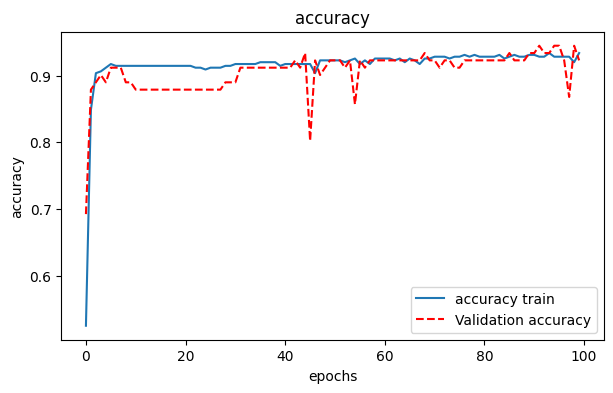

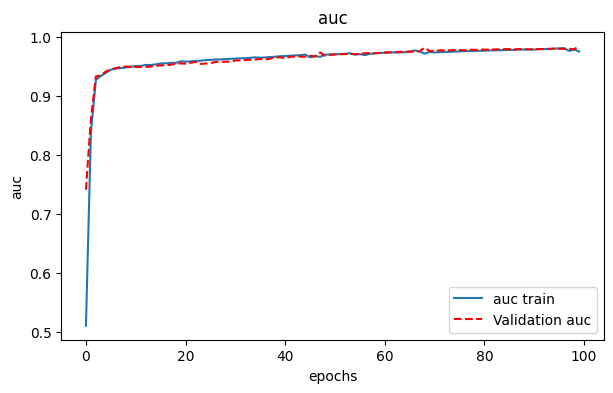

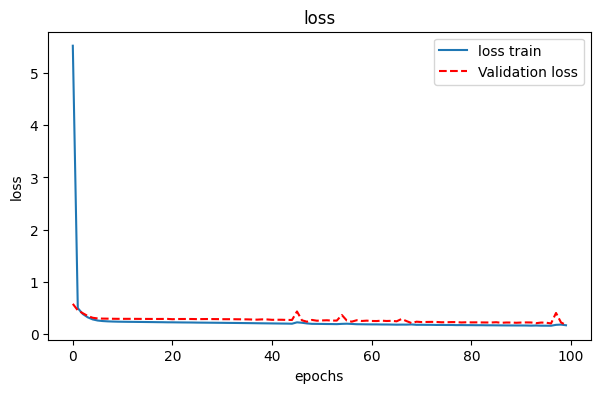

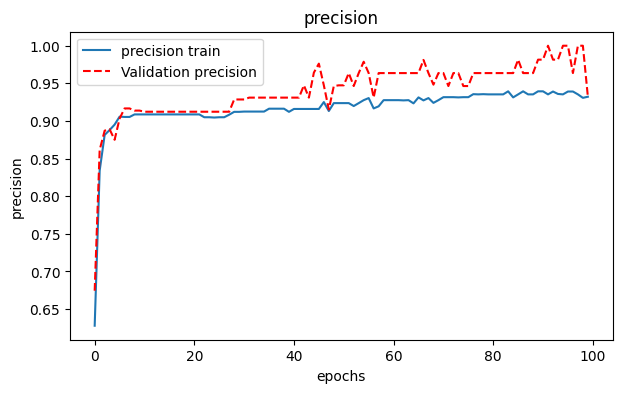

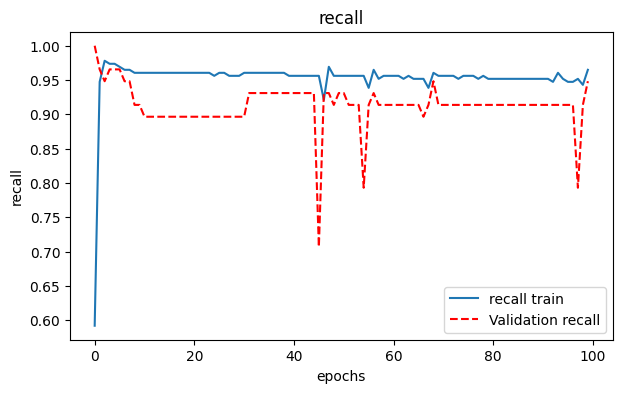

In [7]:
def plot_history(df_history):
    train_metrics = [col for col in df_history.columns if not col.startswith('val_')]
    for metric in train_metrics:
        plt.figure(figsize=(7, 4))
        plt.plot(df_history[metric], label=(f'{metric} train'))
        
        val_metric = f'val_{metric}'
        if val_metric in df_history.columns:
            plt.plot(df_history[val_metric], label=f'Validation {metric}', linestyle='dashed', color='red')

        plt.title(metric)
        plt.xlabel('epochs')
        plt.ylabel(metric)
        plt.legend()
        plt.show()            

plot_history(df_history)   

In [8]:
test_loss_bce, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(X_test, y_test)
print('test_loss_bce', test_loss_bce)
print('test_accuracy', test_accuracy)
print('test_precision', test_precision)
print('test_recall', test_recall)
print('test_auc', test_auc)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9707 - auc: 0.9982 - loss: 0.0784 - precision: 0.9779 - recall: 0.9765 
test_loss_bce 0.08412249386310577
test_accuracy 0.9736841917037964
test_precision 0.9722222089767456
test_recall 0.98591548204422
test_auc 0.9980347752571106


In [9]:
y_pred = model.predict(X_test).ravel() # lo pasamos a 1D
y_pred[:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([4.5989081e-01, 6.2590294e-07, 6.6580577e-04, 9.9291164e-01,
       9.8946124e-01], dtype=float32)

In [ ]:
y_pred_binario = np.where(y_pred >= 0.2, 1, 0) # regla de negocio: dependiendo del problem podemos cambiarlo
y_pred_binario = np.where(y_pred >= 0.5, 1, 0)
y_pred_binario


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [11]:

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score
print("accuracy: ", accuracy_score(y_test, y_pred_binario))
print("precision: ", precision_score(y_test, y_pred_binario))
print("recall (Sensitivity): ", recall_score(y_test, y_pred_binario))
print("F1-score: ", f1_score(y_test, y_pred_binario))
print("AUC: ", roc_auc_score(y_test, y_pred_binario))
print(classification_report(y_test, y_pred_binario))

accuracy:  0.9473684210526315
precision:  0.922077922077922
recall (Sensitivity):  1.0
F1-score:  0.9594594594594594
AUC:  0.9302325581395349
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [12]:
df_comparison = pd.DataFrame({'real': y_test, 'prediccion': y_pred_binario})
df_comparison


,real,prediccion
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
109,1,1
110,0,0
111,1,1
112,1,1


In [13]:
# guardamos el modelo
model.save('bclassification_model.keras')